In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [152]:
ads = pd.read_csv(r'C:\Users\Latitude\Desktop\Data_Analytics\Python\data for homework\homework_6\facebook_ads_data (2.0).csv')
ads.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [9]:
ads.describe()

,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
count,1494.000000,1494.000000,1494.000000,1494.000000,1443.000000,1462.000000,1462.000000,1462.000000
mean,131.035964,34190.182062,318.840696,165.457450,0.814712,5.085677,0.011947,1.326322
std,214.968986,44433.507387,485.663099,274.764573,1.705224,8.107076,0.013192,0.343012
min,0.000000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.751445
25%,18.047500,8377.000000,62.250000,24.350000,0.170000,1.500000,0.004462,1.067832
50%,48.515000,15983.000000,148.000000,65.460000,0.350000,2.775000,0.007845,1.299482
75%,161.790000,45849.750000,371.750000,196.595000,0.765000,5.275000,0.015005,1.527423
max,2035.490000,456481.000000,6199.000000,2562.600000,24.790000,114.150000,0.159223,2.486911


In [23]:
ads.shape

(1494, 10)

In [29]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ad_date            1494 non-null   object 
 1   campaign_name      1494 non-null   object 
 2   total_spend        1494 non-null   float64
 3   total_impressions  1494 non-null   int64  
 4   total_clicks       1494 non-null   int64  
 5   total_value        1494 non-null   float64
 6   cpc                1443 non-null   float64
 7   cpm                1462 non-null   float64
 8   ctr                1462 non-null   float64
 9   romi               1462 non-null   float64
dtypes: float64(6), int64(2), object(2)
memory usage: 116.8+ KB


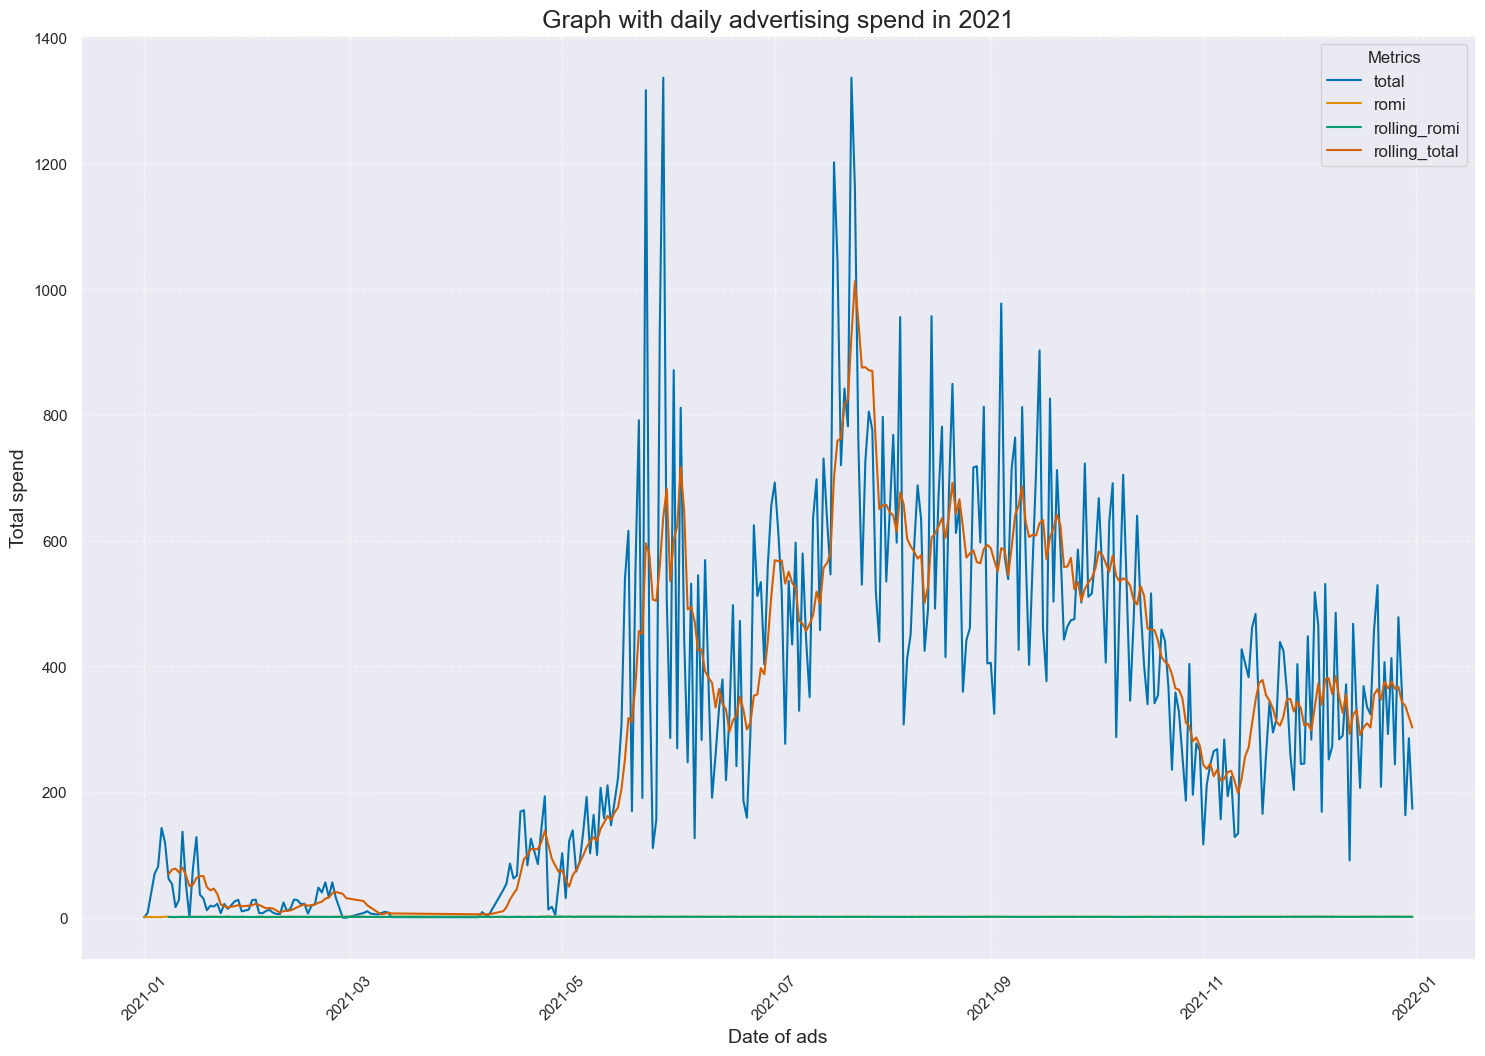

In [246]:
ads['ad_date'] = pd.to_datetime(ads['ad_date'])
ads['ad_date_year'] = ads['ad_date'].dt.year.astype(int)

filtered = ads[ads['ad_date_year'] == 2021]

daily_data = filtered.groupby('ad_date')[['total_spend', 'romi']].agg({'total_spend':'sum', 'romi':'mean'}).reset_index()
daily_data['rolling_romi'] = daily_data['romi'].rolling(window=7).mean()
daily_data['rolling_total_spend'] = daily_data['total_spend'].rolling(window=7).mean()

plt.figure(figsize=(18, 12))
sns.lineplot(data=daily_data, x='ad_date', y='total_spend', label='total')
sns.lineplot(data=daily_data, x='ad_date', y='romi', label='romi')
sns.lineplot(data=daily_data, x='ad_date', y='rolling_romi', label='rolling_romi')
sns.lineplot(data=daily_data, x='ad_date', y='rolling_total_spend', label='rolling_total')
plt.legend(title='Metrics', fontsize=12)
plt.title('Graph with daily advertising spend in 2021', fontsize=18)
plt.xlabel('Date of ads', fontsize=14)
plt.ylabel('Total spend', fontsize=14)
plt.xticks(rotation=45)
sns.set_palette("colorblind")
plt.grid(True, linestyle='--', alpha=0.5)
sns.set_style("darkgrid")

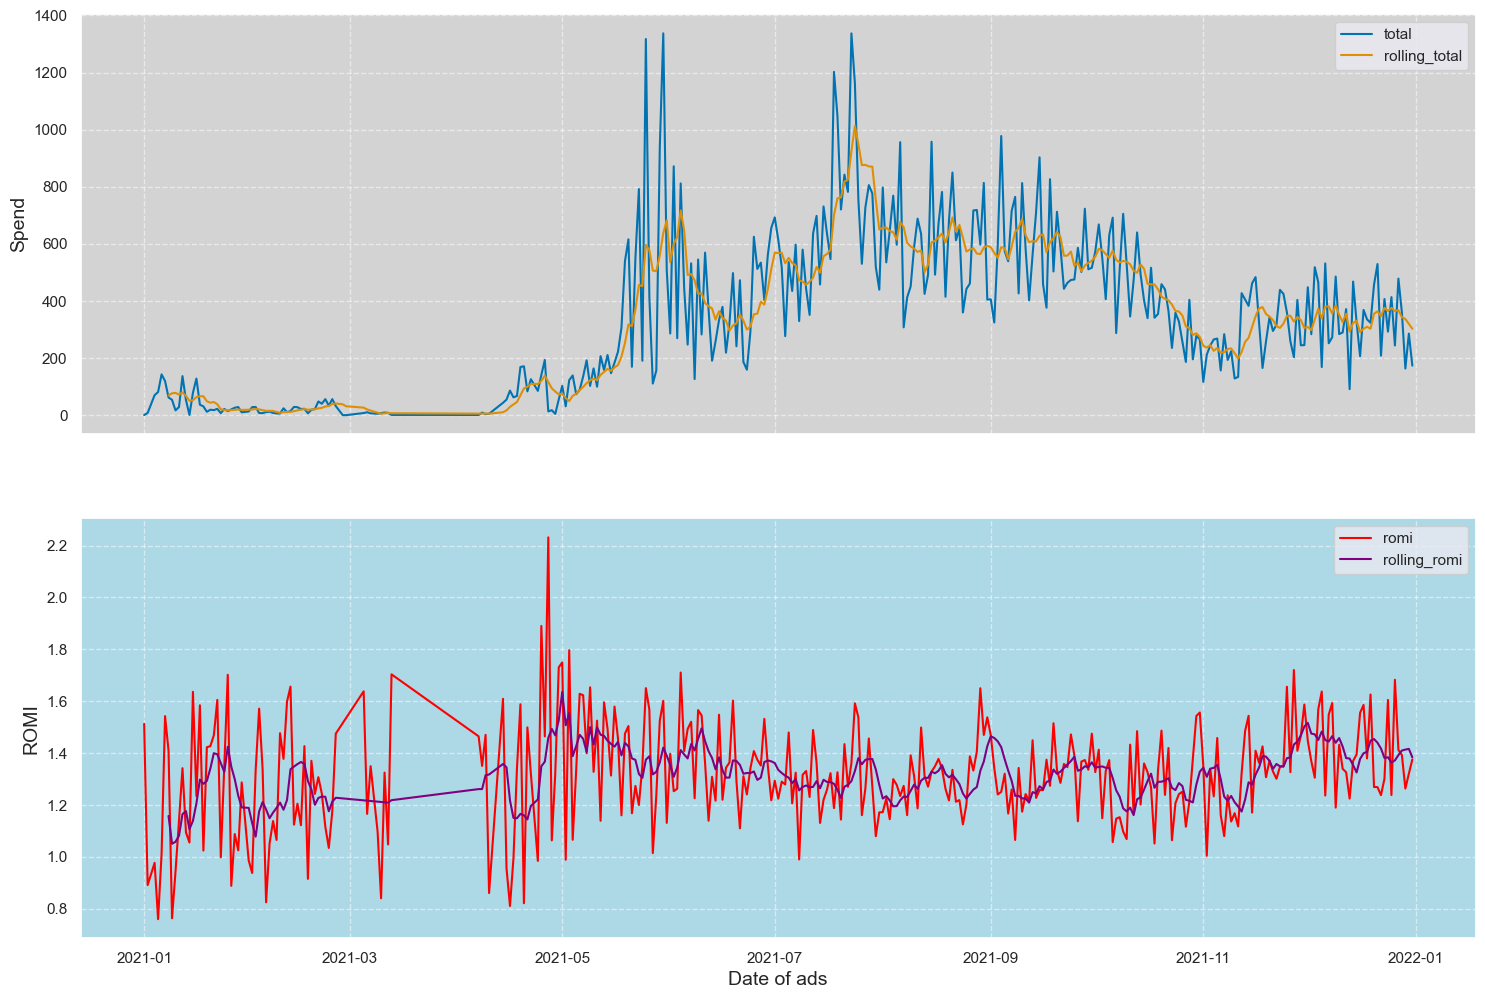

In [314]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

sns.lineplot(data=daily_data, x='ad_date', y='total_spend', label='total', ax=ax[0])
sns.lineplot(data=daily_data, x='ad_date', y='rolling_total_spend', label='rolling_total', ax=ax[0])
ax[0].set_ylabel('Spend', fontsize=14)
ax[0].set_facecolor('lightgrey')
ax[0].grid(True, linestyle='--', alpha=0.5)

sns.lineplot(data=daily_data, x='ad_date', y='romi', label='romi', ax=ax[1], color='red')
sns.lineplot(data=daily_data, x='ad_date', y='rolling_romi', label='rolling_romi', ax=ax[1], color='purple')
ax[1].set_xlabel('Date of ads', fontsize=14)
ax[1].set_ylabel('ROMI', fontsize=14)
ax[1].set_facecolor('lightblue')
ax[1].grid(True, linestyle='--', alpha=0.5)

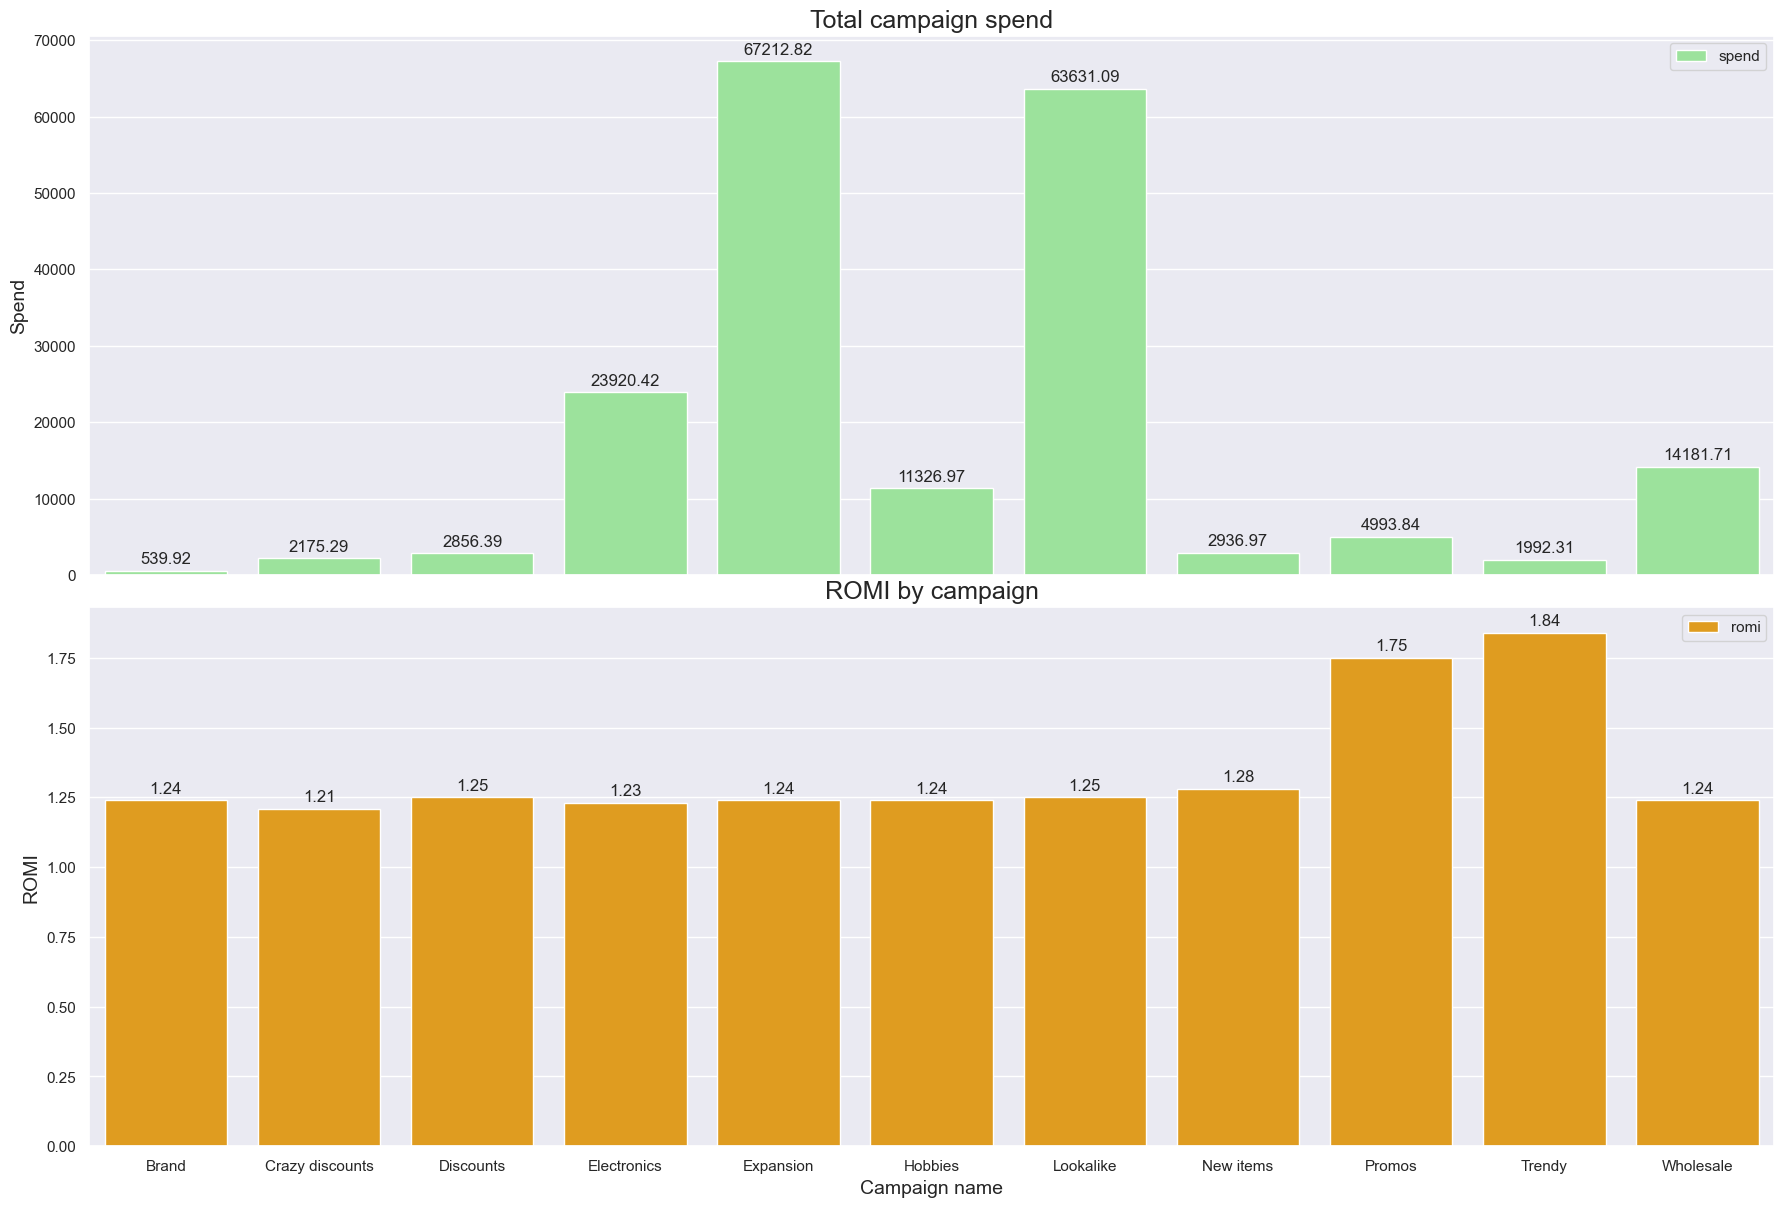

In [404]:
grouped = ads.groupby('campaign_name')[['total_spend', 'romi']].agg({'total_spend':'sum', 'romi':'mean'}).reset_index().round(2)

fig, ax = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

sns.barplot(data=grouped, x='campaign_name', y='total_spend', label='spend', ax=ax[0], color='lightgreen')
ax[0].set_title('Total campaign spend', fontsize=18)
ax[0].set_ylabel('Spend', fontsize=14)
for container in ax[0].containers:
    ax[0].bar_label(container, fmt='%.2f', padding=3)
plt.tight_layout()
    

sns.barplot(data=grouped, x='campaign_name', y='romi', label='romi', ax=ax[1], color='orange')
ax[1].set_title('ROMI by campaign', fontsize=18)
ax[1].set_xlabel('Campaign name', fontsize=14)
ax[1].set_ylabel('ROMI', fontsize=14)
for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%.2f', padding=3)

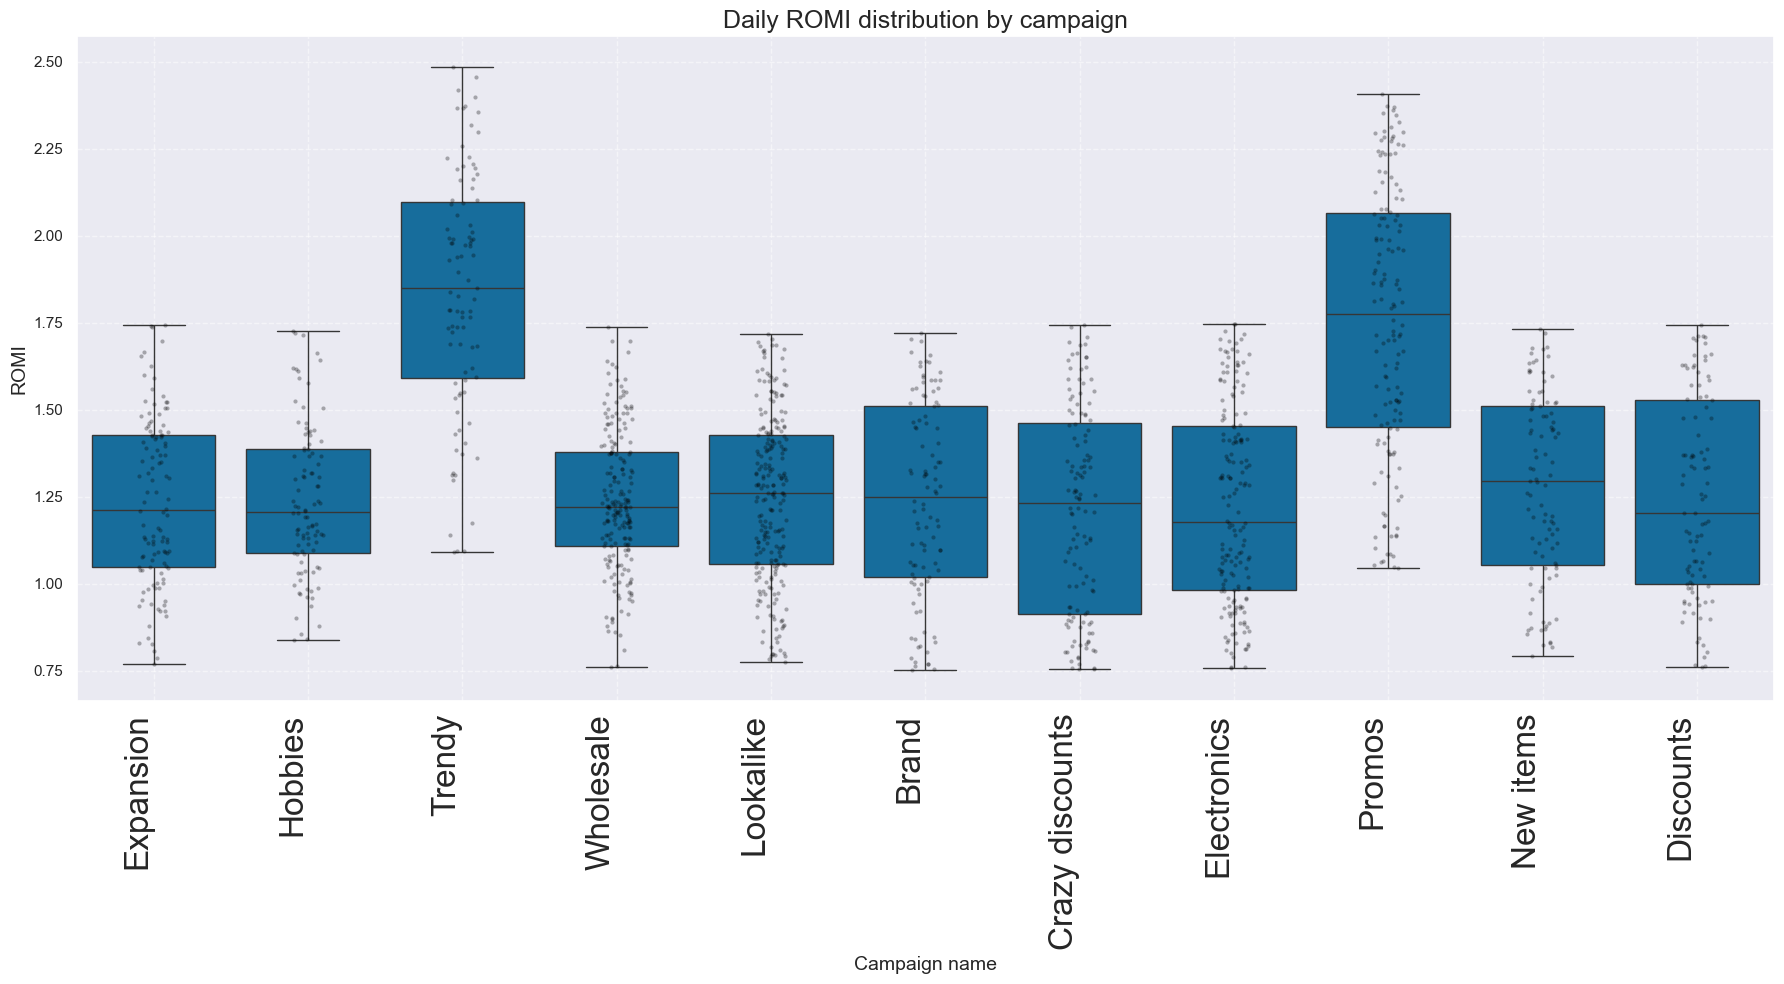

In [534]:
plt.figure(figsize=(18, 10))
sns.set_style("darkgrid")
sns.set_palette("colorblind")

sns.boxplot(data=ads, x='campaign_name', y='romi')
sns.stripplot(data=ads, x='campaign_name', y='romi', color='black', alpha=0.3, size=3, jitter=True)

plt.title('Daily ROMI distribution by campaign', fontsize=18)
plt.xlabel('Campaign name', fontsize=14)
plt.ylabel('ROMI', fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=24)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

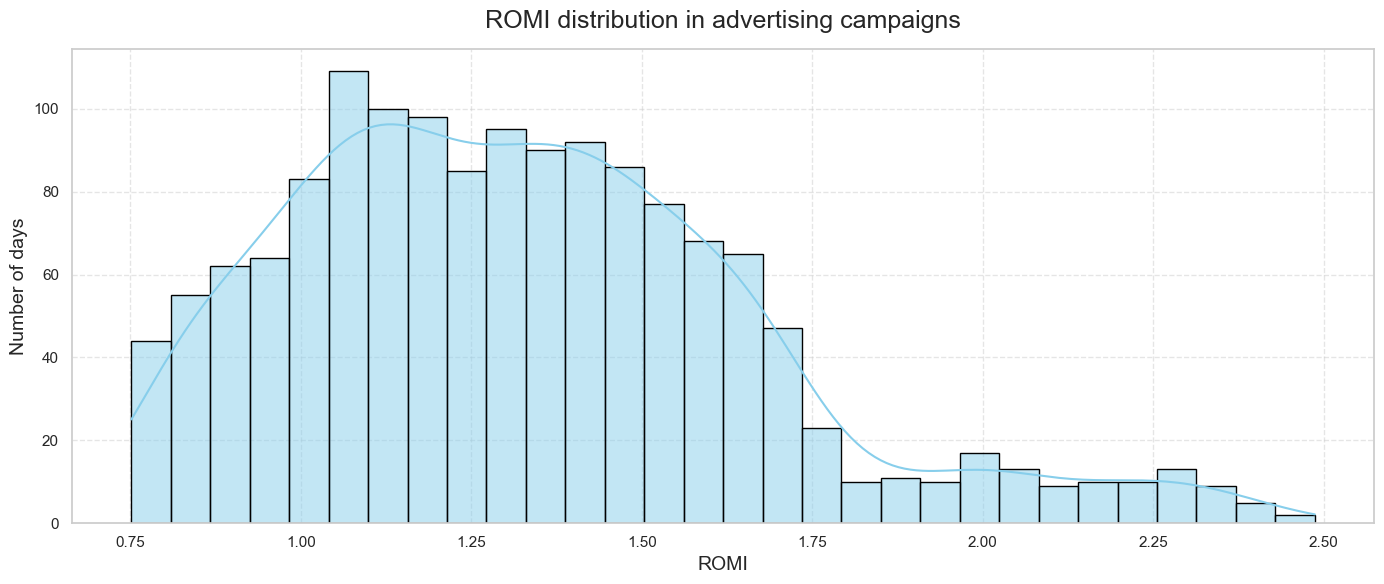

In [522]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.histplot(ads['romi'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.title('ROMI distribution in advertising campaigns', fontsize=18, pad=15)
plt.xlabel('ROMI', fontsize=14)
plt.ylabel('Number of days', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

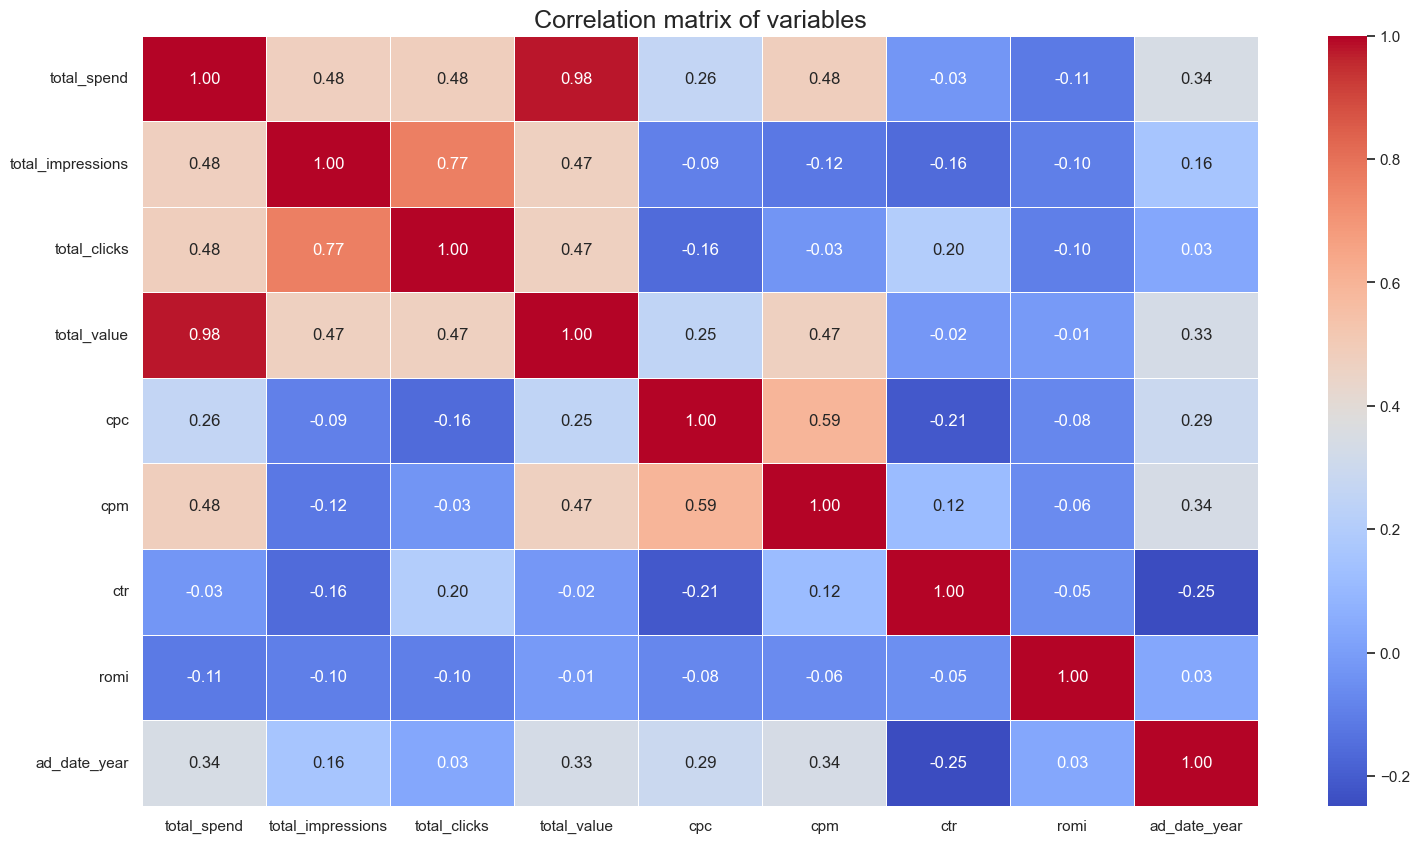

In [560]:
plt.figure(figsize=(18, 10))
sns.heatmap(ads.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, linecolor='white')
plt.title('Correlation matrix of variables', fontsize=18)
plt.show()

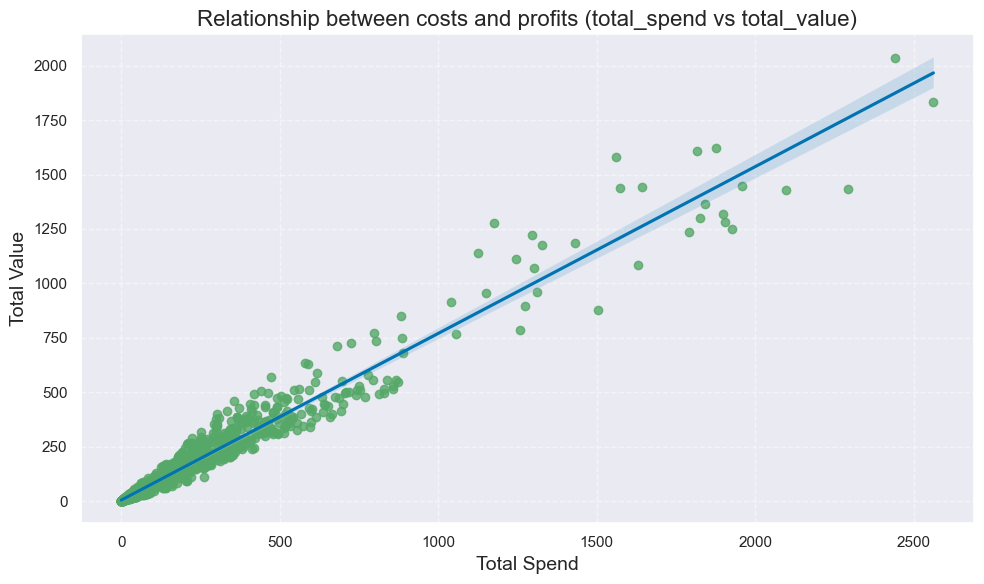

In [590]:
plt.figure(figsize=(10, 6))
sns.regplot(data=ads, x='total_value', y='total_spend', scatter_kws={'color':'g'})
plt.title('Relationship between costs and profits (total_spend vs total_value)', fontsize=16)
plt.xlabel('Total Spend', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()